In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import csv
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA,IncrementalPCA, FactorAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

plt.rcParams['figure.figsize'] = [10, 5]
%matplotlib inline

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
pd.options.display.max_columns = 9999
pd.options.display.max_rows = 999999

In [2]:
apptrain=pd.read_csv("application_train.csv")
apptest=pd.read_csv("application_test.csv")
bureau=pd.read_csv("bureau.csv")
bbal=pd.read_csv("bureau_balance.csv")
ccbal=pd.read_csv("credit_card_balance.csv")
innpay=pd.read_csv("installments_payments.csv")
POS=pd.read_csv("POS_CASH_balance.csv")
old=pd.read_csv("previous_application.csv")

In [4]:
apptrain.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
apptest.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [6]:
a=((apptrain.isnull().sum()/apptrain.shape[0])*100).sort_values(ascending=False)
a[a>40]

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [7]:
nullcolumnlist=[
"COMMONAREA_MEDI",
"COMMONAREA_AVG",
"COMMONAREA_MODE",
"NONLIVINGAPARTMENTS_MODE",
"NONLIVINGAPARTMENTS_MEDI",
"NONLIVINGAPARTMENTS_AVG",
"FONDKAPREMONT_MODE",
"LIVINGAPARTMENTS_AVG",
"LIVINGAPARTMENTS_MEDI",
"LIVINGAPARTMENTS_MODE",
"FLOORSMIN_MEDI",
"FLOORSMIN_MODE",
"FLOORSMIN_AVG",
"OWN_CAR_AGE",
"YEARS_BUILD_MEDI",
"YEARS_BUILD_MODE",
"YEARS_BUILD_AVG",
"LANDAREA_AVG",
"LANDAREA_MODE",
"LANDAREA_MEDI",
"BASEMENTAREA_AVG",
"BASEMENTAREA_MODE",
"BASEMENTAREA_MEDI",
"NONLIVINGAREA_MODE",
"NONLIVINGAREA_AVG",
"NONLIVINGAREA_MEDI",
"ELEVATORS_AVG",
"ELEVATORS_MEDI",
"ELEVATORS_MODE",
"WALLSMATERIAL_MODE",
"APARTMENTS_AVG",
"APARTMENTS_MEDI",
"APARTMENTS_MODE",
"HOUSETYPE_MODE",
"ENTRANCES_MEDI",
"ENTRANCES_AVG",
"ENTRANCES_MODE",
"LIVINGAREA_MEDI",
"LIVINGAREA_MODE",
"LIVINGAREA_AVG",
"FLOORSMAX_MODE",
"FLOORSMAX_MEDI",
"FLOORSMAX_AVG",
"YEARS_BEGINEXPLUATATION_AVG",
"YEARS_BEGINEXPLUATATION_MEDI",
"YEARS_BEGINEXPLUATATION_MODE",
"TOTALAREA_MODE",
"EMERGENCYSTATE_MODE",
"EXT_SOURCE_1",
"EXT_SOURCE_2",
"EXT_SOURCE_3"
]

categoricalnull=[]
for a in nullcolumnlist:
    try:
        apptrain[a].fillna(apptrain[a].mean(),inplace=True)
    except:
        categoricalnull.append(a)

In [8]:
categoricalnull

['FONDKAPREMONT_MODE',
 'WALLSMATERIAL_MODE',
 'HOUSETYPE_MODE',
 'EMERGENCYSTATE_MODE']

In [9]:
a=((apptrain.isnull().sum()/apptrain.shape[0])*100).sort_values(ascending=False)
a[a>0]

FONDKAPREMONT_MODE            68.386172
WALLSMATERIAL_MODE            50.840783
HOUSETYPE_MODE                50.176091
EMERGENCYSTATE_MODE           47.398304
OCCUPATION_TYPE               31.345545
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
NAME_TYPE_SUITE                0.420148
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64

In [10]:
apptrain["AMT_REQ_CREDIT_BUREAU_HOUR"].fillna(value=0,inplace=True)
apptrain["AMT_REQ_CREDIT_BUREAU_DAY"].fillna(value=0,inplace=True)
apptrain["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(value=0,inplace=True)
apptrain["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(value=0,inplace=True)
apptrain["AMT_REQ_CREDIT_BUREAU_MON"].fillna(value=0,inplace=True)
apptrain["AMT_REQ_CREDIT_BUREAU_WEEK"].fillna(value=0,inplace=True)

apptrain["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(0,inplace=True)
apptrain["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(0,inplace=True)
apptrain["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(0,inplace=True)
apptrain["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(0,inplace=True)

apptrain["CNT_FAM_MEMBERS"].fillna(0,inplace=True)
apptrain["AMT_GOODS_PRICE"].fillna(0,inplace=True)
apptrain["DAYS_LAST_PHONE_CHANGE"].fillna(apptrain["DAYS_LAST_PHONE_CHANGE"].min(),inplace=True)

In [11]:
a=((apptrain.isnull().sum()/apptrain.shape[0])*100).sort_values(ascending=False)
a[a>0]

FONDKAPREMONT_MODE     68.386172
WALLSMATERIAL_MODE     50.840783
HOUSETYPE_MODE         50.176091
EMERGENCYSTATE_MODE    47.398304
OCCUPATION_TYPE        31.345545
NAME_TYPE_SUITE         0.420148
AMT_ANNUITY             0.003902
dtype: float64

In [12]:
b=pd.DataFrame({'column':apptrain.dtypes.astype('object').index,'dtype':apptrain.dtypes.astype('object').values})

categorical=b[b['dtype']=='object'].iloc[:,0].tolist()

for a in categorical:
    try:
        apptrain[a].fillna("Missing",inplace=True)
    except:
        print(a)

In [13]:
a=((apptrain.isnull().sum()/apptrain.shape[0])*100).sort_values(ascending=False)
a[a>0]

AMT_ANNUITY    0.003902
dtype: float64

In [14]:
for index, row in apptrain[apptrain["AMT_ANNUITY"].isnull()].iterrows():
    a=apptrain["AMT_CREDIT"][index]/21
    apptrain["AMT_ANNUITY"][index]=a.astype('int')

D:\product\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
a=((apptrain.isnull().sum()/apptrain.shape[0])*100).sort_values(ascending=False)
a[a>0]

Series([], dtype: float64)

# DataPreprocessing - TEST

In [16]:
a=((apptest.isnull().sum()/apptest.shape[0])*100).sort_values(ascending=False)
a[a>40]

COMMONAREA_MEDI                 68.716150
COMMONAREA_AVG                  68.716150
COMMONAREA_MODE                 68.716150
NONLIVINGAPARTMENTS_MODE        68.412523
NONLIVINGAPARTMENTS_MEDI        68.412523
NONLIVINGAPARTMENTS_AVG         68.412523
FONDKAPREMONT_MODE              67.284179
LIVINGAPARTMENTS_AVG            67.249302
LIVINGAPARTMENTS_MEDI           67.249302
LIVINGAPARTMENTS_MODE           67.249302
FLOORSMIN_MEDI                  66.605121
FLOORSMIN_MODE                  66.605121
FLOORSMIN_AVG                   66.605121
OWN_CAR_AGE                     66.289184
YEARS_BUILD_MEDI                65.275726
YEARS_BUILD_MODE                65.275726
YEARS_BUILD_AVG                 65.275726
LANDAREA_AVG                    57.964057
LANDAREA_MODE                   57.964057
LANDAREA_MEDI                   57.964057
BASEMENTAREA_AVG                56.706466
BASEMENTAREA_MODE               56.706466
BASEMENTAREA_MEDI               56.706466
NONLIVINGAREA_MODE              53

In [26]:
nullcolumnlist=[
"COMMONAREA_MEDI",
"COMMONAREA_AVG",
"COMMONAREA_MODE",
"NONLIVINGAPARTMENTS_MODE",
"NONLIVINGAPARTMENTS_MEDI",
"NONLIVINGAPARTMENTS_AVG",
"FONDKAPREMONT_MODE",
"LIVINGAPARTMENTS_AVG",
"LIVINGAPARTMENTS_MEDI",
"LIVINGAPARTMENTS_MODE",
"FLOORSMIN_MEDI",
"FLOORSMIN_MODE",
"FLOORSMIN_AVG",
"OWN_CAR_AGE",
"YEARS_BUILD_MEDI",
"YEARS_BUILD_MODE",
"YEARS_BUILD_AVG",
"LANDAREA_AVG",
"LANDAREA_MODE",
"LANDAREA_MEDI",
"BASEMENTAREA_AVG",
"BASEMENTAREA_MODE",
"BASEMENTAREA_MEDI",
"NONLIVINGAREA_MODE",
"NONLIVINGAREA_AVG",
"NONLIVINGAREA_MEDI",
"ELEVATORS_AVG",
"ELEVATORS_MEDI",
"ELEVATORS_MODE",
"WALLSMATERIAL_MODE",
"APARTMENTS_AVG",
"APARTMENTS_MEDI",
"APARTMENTS_MODE",
"HOUSETYPE_MODE",
"ENTRANCES_MEDI",
"ENTRANCES_AVG",
"ENTRANCES_MODE",
"LIVINGAREA_MEDI",
"LIVINGAREA_MODE",
"LIVINGAREA_AVG",
"FLOORSMAX_MODE",
"FLOORSMAX_MEDI",
"FLOORSMAX_AVG",
"YEARS_BEGINEXPLUATATION_AVG",
"YEARS_BEGINEXPLUATATION_MEDI",
"YEARS_BEGINEXPLUATATION_MODE",
"TOTALAREA_MODE",
"EMERGENCYSTATE_MODE",
"EXT_SOURCE_1",
"EXT_SOURCE_2",
"EXT_SOURCE_3"
]

categoricalnull=[]
for a in nullcolumnlist:
    try:
        apptest[a].fillna(apptest[a].mean(),inplace=True)
    except:
        categoricalnull.append(a)

In [27]:
categoricalnull

['FONDKAPREMONT_MODE',
 'WALLSMATERIAL_MODE',
 'HOUSETYPE_MODE',
 'EMERGENCYSTATE_MODE']

In [28]:
a=((apptest.isnull().sum()/apptest.shape[0])*100).sort_values(ascending=False)
a[a>0]

Series([], dtype: float64)

In [20]:
apptest["AMT_REQ_CREDIT_BUREAU_HOUR"].fillna(value=0,inplace=True)
apptest["AMT_REQ_CREDIT_BUREAU_DAY"].fillna(value=0,inplace=True)
apptest["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(value=0,inplace=True)
apptest["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(value=0,inplace=True)
apptest["AMT_REQ_CREDIT_BUREAU_MON"].fillna(value=0,inplace=True)
apptest["AMT_REQ_CREDIT_BUREAU_WEEK"].fillna(value=0,inplace=True)

apptest["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(0,inplace=True)
apptest["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(0,inplace=True)
apptest["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(0,inplace=True)
apptest["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(0,inplace=True)

apptest["CNT_FAM_MEMBERS"].fillna(0,inplace=True)
apptest["AMT_GOODS_PRICE"].fillna(0,inplace=True)
apptest["DAYS_LAST_PHONE_CHANGE"].fillna(apptest["DAYS_LAST_PHONE_CHANGE"].min(),inplace=True)

In [21]:
a=((apptest.isnull().sum()/apptest.shape[0])*100).sort_values(ascending=False)
a[a>0]

FONDKAPREMONT_MODE     67.284179
WALLSMATERIAL_MODE     49.017315
HOUSETYPE_MODE         48.455194
EMERGENCYSTATE_MODE    45.562531
OCCUPATION_TYPE        32.014197
NAME_TYPE_SUITE         1.868948
AMT_ANNUITY             0.049237
dtype: float64

In [22]:
b=pd.DataFrame({'column':apptest.dtypes.astype('object').index,'dtype':apptest.dtypes.astype('object').values})

categorical=b[b['dtype']=='object'].iloc[:,0].tolist()

for a in categorical:
    try:
        apptest[a].fillna("Missing",inplace=True)
    except:
        print(a)

In [23]:
a=((apptest.isnull().sum()/apptest.shape[0])*100).sort_values(ascending=False)
a[a>0]

AMT_ANNUITY    0.049237
dtype: float64

In [24]:
for index, row in apptest[apptest["AMT_ANNUITY"].isnull()].iterrows():
    a=apptest["AMT_CREDIT"][index]/21
    apptest["AMT_ANNUITY"][index]=a.astype('int')

D:\product\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
a=((apptest.isnull().sum()/apptest.shape[0])*100).sort_values(ascending=False)
a[a>0]

Series([], dtype: float64)

In [25]:
apptrain

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,12.061091,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.02470,0.036900,0.972200,0.619200,0.014300,0.000000,0.069000,0.083300,0.125000,0.036900,0.020200,0.019000,0.000000,0.000000,0.025200,0.038300,0.972200,0.634100,0.014400,0.00000,0.069000,0.083300,0.125000,0.037700,0.022000,0.019800,0.000000,0.000000,0.02500,0.036900,0.972200,0.624300,0.014400,0.000000,0.069000,0.083300,0.125000,0.037500,0.020500,0.019300,0.000000,0.000000,reg oper account,block of flats,0.014900,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,12.061091,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,0.510853,0.09590,0.052900,0.985100,0.796000,0.060500,0.080000,0.034500,0.291700,0.333300,0.013000,0.077300,0.054900,0.003900,0.009800,0.092400,0.053800,0.985100,0.804000,0.049700,0.08060,0.034500,0.291700,0.333300,0.012800,0.079000,0.055400,0.000000,0.000000,0.09680,0.052900,0.985100,0.798700,0.060800,0.080000,0.034500,0.291700,0.333300,0.013200,0.078700,0.055800,0.003900,0.010000,reg oper account,block of flats,0.071400,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-25

In [30]:
apptest.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,11.786027,1,1,0,1,0,1,Missing,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.066000,0.059000,0.973200,0.751137,0.047624,0.085168,0.137900,0.125000,0.238423,0.067192,0.105885,0.050500,0.009231,0.029387,0.067200,0.061200,0.973200,0.758327,0.045223,0.08057,0.137900,0.12500,0.233854,0.065914,0.110874,0.052600,0.008358,0.028161,0.066600,0.059000,0.973200,0.754344,0.04742,0.084128,0.1379,0.125000,0.237846,0.068069,0.107063,0.051400,0.008979,0.029296,Missing,block of flats,0.039200,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,11.786027,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,0.122388,0.090065,0.978828,0.751137,0.047624,0.085168,0.151777,0.233706,0.238423,0.067192,0.105885,0.112286,0.009231,0.029387,0.119078,0.088998,0.978292,0.758327,0.045223,0.08057,0.147161,0.22939,0.233854,0.065914,0.110874,0.110687,0.008358,0.028161,0.122809,0.089529,0.978822,0.754344,0.04742,0.084128,0.1512,0.233154,0.237846,0.068069,0.107063,0.113368,0.008979,0.029296,Missing,Missing,0.107129,Missing,Missing,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,Missing,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.000000,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,0.501180,0

In [31]:
one_hot_encoded_apptrain = pd.get_dummies(apptrain)
one_hot_encoded_apptest = pd.get_dummies(apptest)

In [32]:
one_hot_encoded_apptrain.columns.difference(one_hot_encoded_apptest.columns)

Index(['CODE_GENDER_XNA', 'NAME_FAMILY_STATUS_Unknown',
       'NAME_INCOME_TYPE_Maternity leave', 'TARGET'],
      dtype='object')

In [33]:
final_train_encoded, final_test_encoded = one_hot_encoded_apptrain.align(one_hot_encoded_apptest,
                                                                    join='inner', 
                                                                    axis=1)

In [34]:
final_train_encoded=final_train_encoded.join(apptrain["TARGET"])

In [35]:
final_train_encoded.to_csv("apptrain_encoded.csv",sep=',',encoding='utf',index=False)
final_test_encoded.to_csv("apptest_encoded.csv",sep=',',encoding='utf',index=False)

In [ ]:
apptest_encoded.csv

In [36]:
sm=SMOTE(random_state=15,ratio='minority')

In [44]:
x_res,y_res=sm.fit_sample(X=final_train_encoded.drop("TARGET",axis=1),y=final_train_encoded["TARGET"])

In [50]:
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.33, random_state=42)

In [51]:
rfclf = RandomForestClassifier(n_estimators=512,random_state=12)

In [52]:
rfclf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=512, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [65]:
rfclf.feature_importances_

array([6.64861820e-03, 8.68194986e-03, 5.78708972e-03, 6.14641218e-03,
       6.18557652e-03, 5.58216665e-03, 6.57659155e-03, 7.19058332e-03,
       5.59922026e-03, 6.39734833e-03, 6.87806507e-03, 7.12001423e-03,
       0.00000000e+00, 3.95816938e-04, 6.87305706e-03, 5.81564915e-05,
       1.63500401e-02, 7.77095620e-04, 1.26805420e-02, 1.24373012e-02,
       1.24290957e-02, 5.24838086e-03, 3.64201743e-04, 8.40606448e-04,
       7.08715460e-04, 5.58661934e-03, 1.52362647e-02, 9.33676935e-03,
       9.80314394e-03, 2.51477700e-02, 3.44546227e-02, 3.71638588e-03,
       2.30721078e-03, 3.57959443e-03, 1.91014301e-03, 2.11861802e-03,
       7.83212071e-03, 3.09319448e-03, 6.61861694e-03, 2.93676672e-03,
       2.14979111e-03, 2.45695186e-03, 4.33845285e-03, 5.44042508e-03,
       5.91901120e-03, 3.80181212e-03, 1.85845340e-03, 4.46634465e-03,
       1.59388861e-03, 2.06287225e-03, 8.00497842e-03, 4.46843388e-03,
       7.60298681e-03, 3.96438599e-03, 2.14438333e-03, 2.24202598e-03,
      

In [59]:
probs = rfclf.predict(X_test)

In [60]:
accuracy_score(y_test, probs)

0.9558457011464682

In [61]:
roc_auc_score(y_test,probs)

0.9558061435790693

In [64]:
confusion_matrix(y_test,probs)

array([[93370,     0],
       [ 8238, 84965]], dtype=int64)

In [62]:
#preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

Text(0.5,0,'False Positive Rate')

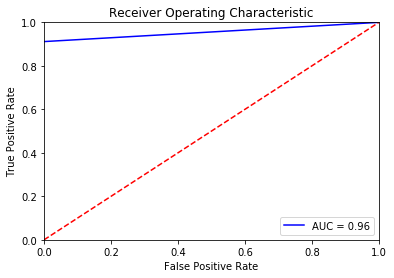

In [63]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [54]:
Submission=pd.DataFrame({'SK_ID_CURR':final_test_encoded.SK_ID_CURR,'TARGET':probs[:,1].round(1)})

In [56]:
Submission.to_csv("Submission_D_512.csv",sep=',',encoding='utf-8',index=False)

In [66]:
import lightgbm as lgb
from sklearn import preprocessing

In [67]:
min_max_scaler = preprocessing.MinMaxScaler()
Xx = min_max_scaler.fit_transform(final_train_encoded.drop("TARGET",axis=1))

In [68]:
train_data = lgb.Dataset(data=final_train_encoded.drop("TARGET",axis=1),label=final_train_encoded["TARGET"])

In [69]:
param = {'num_leaves':128, 'num_trees':1024, 'objective':'binary'}
param['metric'] = ['roc_curve','binary_logloss']

In [70]:
num_round = 16
bst = lgb.train(param, train_data, num_round)

D:\product\Anaconda\lib\site-packages\lightgbm\engine.py:102: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [71]:
ypred = bst.predict(final_test_encoded)

In [73]:
SubmissionLGBM=pd.DataFrame({'SK_ID_CURR':final_test_encoded.SK_ID_CURR,'TARGET':ypred.round(1)})

In [75]:
SubmissionLGBM.to_csv("Submission_LGBM.csv",sep=',',encoding='utf-8',index=False)